In [1]:
pip freeze

absl-py==2.1.0
aiohttp==3.9.5
aiosignal==1.3.1
anyio==4.4.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.2.0
Babel==2.15.0
beautifulsoup4==4.12.3
bleach==6.1.0
Brotli==1.1.0
certifi==2024.7.4
cffi==1.16.0
charset-normalizer==3.3.2
click==8.1.7
colorama==0.4.6
comm==0.2.2
contourpy==1.2.1
cycler==0.12.1
datasets==2.20.0
debugpy==1.8.2
decorator==5.1.1
defusedxml==0.7.1
dill==0.3.8
executing==2.0.1
fastjsonschema==2.20.0
filelock==3.15.4
fonttools==4.53.1
fqdn==1.5.1
frozenlist==1.4.1
fsspec==2024.5.0
h11==0.14.0
httpcore==1.0.5
httpx==0.27.0
huggingface-hub==0.24.2
idna==3.7
inflate64==1.0.0
ipykernel==6.29.5
ipython==8.26.0
ipywidgets==8.1.3
isoduration==20.11.0
jedi==0.19.1
Jinja2==3.1.4
joblib==1.4.2
json5==0.9.25
jsonpointer==3.0.0
jsonschema==4.23.0
jsonschema-specifications==2023.12.1
jupyter==1.0.0
jupyter-console==6.6.3
jupyter-events==0.10.0
jupyter-lsp==2.2.5
jupyter_client==8.6.2
jupyter_core==5.7.2
jupyter_server==

In [1]:
# # Install necessary packages for text summarization
!pip install transformers[sentencepiece] sacrebleu -q
!pip install requests==2.31.0
!pip install "pyarrow>=14.0.1,<15.0.0"
!pip install py7zr
!pip install datasets
!pip install rouge_score
!pip install matplotlib
!pip install pandas nltk tqdm


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 2.20.0 requires requests>=2.32.2, but you have requests 2.31.0 which is incompatible.

[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pyarrow-14.0.2-cp311-cp311-win_amd64.whl (24.6 MB)
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 2.20.0 requires pyarrow>=15.0.0, but you have pyarrow 14.0.2 which is incompatible.
datasets 2.20.0 requires requests>=2.32.2, but you have requests 2.31.0 which is incompatible.

[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pyarrow-17.0.0-cp311-cp311-win_amd64.whl (25.2 MB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2



[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import libraries

In [2]:
# Import the pipeline and set_seed function from the transformers library
# The pipeline function provides an easy way to use pretrained models for various tasks
# such as text generation, summarization, translation, and more
# The set_seed function is used to ensure reproducibility of results by setting a random seed
from transformers import pipeline, set_seed

# Import matplotlib for plotting graphs and visualizations
# This library is used to create static, animated, and interactive visualizations in Python
# Useful for displaying data and model performance
import matplotlib.pyplot as plt

# Import pandas for data manipulation and analysis
# Pandas is a powerful data analysis and manipulation library for Python
# Useful for handling datasets, reading/writing CSV files, and data preprocessing
import pandas as pd

# Import the AutoModelForSeq2SeqLM and AutoTokenizer classes from the transformers library
# AutoModelForSeq2SeqLM is a generic model class for sequence-to-sequence language modeling
# Useful for tasks such as translation, summarization, and text generation
# AutoTokenizer is used for tokenizing input text to the format required by the model
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# Import the nltk library and the sent_tokenize function for sentence tokenization
# nltk (Natural Language Toolkit) is a suite of libraries and programs for natural language processing
# Useful for various text processing tasks like tokenization, lemmatization, and more
# sent_tokenize is used to split a text into a list of sentences
import nltk
from nltk.tokenize import sent_tokenize

# Import the tqdm library for creating progress bars
# tqdm is used to show progress bars for loops, making it easier to track the progress of operations
# Useful for monitoring the progress of tasks such as data processing and model training
from tqdm import tqdm

# Import the torch library for PyTorch functionalities
# PyTorch is an open-source machine learning library used for applications such as computer vision and natural language processing
# Provides tools for tensor computation, automatic differentiation, and more
import torch

# Download the "punkt" tokenizer model from nltk
# The "punkt" tokenizer is a pre-trained model for tokenizing text into sentences
# Useful for splitting a large text into individual sentences for further processing
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saima\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Import the function to load datasets from the 'datasets' library
# The 'datasets' library provides a wide range of datasets and tools for handling and processing data,
# making it easier to access datasets from various sources including the Hugging Face hub or local files.
from datasets import load_dataset

# Import the function to load evaluation metrics from the 'datasets' library
# Metrics are used to evaluate the performance of machine learning models. The 'datasets' library includes 
# several standard metrics, allowing you to assess how well your model's predictions align with human evaluations.
from datasets import load_metric


In [4]:
# Importing AutoModelForSeq2SeqLM and AutoTokenizer from the 'transformers' library

# AutoModelForSeq2SeqLM is a class that provides a generic interface to any pre-trained sequence-to-sequence model.
# Sequence-to-sequence models are used for tasks like text summarization, translation, and other tasks where 
# an input sequence is transformed into an output sequence.
from transformers import AutoModelForSeq2SeqLM

# AutoTokenizer is a class that provides a tokenizer for any pre-trained model.
# Tokenizers convert text into a format that the model can understand (e.g., converting text to tokens or IDs).
# This is a crucial step before passing text data to the model for processing.
from transformers import AutoTokenizer



### Setting Up Variables

In [5]:
# Set the device to "cuda" if a GPU with CUDA support is available, otherwise use "cpu".
# This allows you to leverage GPU acceleration for faster model training and inference if a compatible GPU is present.
device = "cuda" if torch.cuda.is_available() else "cpu"

# Specify the model checkpoint identifier for a pre-trained model.
# In this case, 'google/pegasus-cnn_dailymail' refers to a specific pre-trained PEGASUS model fine-tuned on the CNN/DailyMail dataset.
# This model is used for tasks like text summarization, leveraging its pre-trained capabilities to generate summaries from input text.
model_ckpt = "google/pegasus-cnn_dailymail"

# Load the tokenizer associated with the pre-trained model checkpoint.
# The tokenizer converts text into tokens or IDs that the model can process.
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

# Load the pre-trained model specified by the checkpoint and move it to the specified device (CPU or GPU).
# The model is used for generating predictions based on the input data.
model_pegasus = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device)


print(f"Using device: {device}")
print(f"Using model checkpoint: {model_ckpt}")
print(f"Tokenizer type: {type(tokenizer)}")
print(f"Model type: {type(model_pegasus)}")



Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using device: cpu
Using model checkpoint: google/pegasus-cnn_dailymail
Tokenizer type: <class 'transformers.models.pegasus.tokenization_pegasus_fast.PegasusTokenizerFast'>
Model type: <class 'transformers.models.pegasus.modeling_pegasus.PegasusForConditionalGeneration'>


### Loading the SAMSum Dataset

In this section, we load the 'samsum' dataset using the `load_dataset` function from the `datasets` library. The 'samsum' dataset contains dialogues along with their corresponding summaries. It is designed to be used for tasks like text summarization and dialogue summarization, making it a valuable resource for training and evaluating summarization models.


In [14]:
dataset_samsum = load_dataset("samsum")
print(dataset_samsum)

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})


### Inspecting the SAMSum Dataset

In [19]:
# Print the first example from the training set of the 'samsum' dataset.
# This allows you to inspect the format and contents of the dataset, including the text and summary fields.
print(dataset_samsum["train"][0])

{'id': '13818513', 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)", 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.'}


In [16]:
# Set display options for pandas DataFrames to show all rows and columns.
# This is useful for inspecting entire DataFrames without truncation, especially when dealing with large or complex data.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [17]:
# Convert the training set of the 'samsum' dataset to a pandas DataFrame.
    df_train = dataset_samsum["train"].to_pandas()

    # Print the first 100 rows of the DataFrame to get an overview of the dataset.
    print(df_train.head(100))

            id                                           dialogue  \
0     13818513  Amanda: I baked  cookies. Do you want some?\r\...   
1     13728867  Olivia: Who are you voting for in this electio...   
2     13681000  Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...   
3     13730747  Edward: Rachel, I think I'm in ove with Bella....   
4     13728094  Sam: hey  overheard rick say something\r\nSam:...   
5     13716343  Neville: Hi there, does anyone remember what d...   
6     13611672  John: Ave. Was there any homework for tomorrow...   
7     13730463  Sarah: I found a song on youtube and I think y...   
8     13809976  Noah: When and where are we meeting? :)\r\nMad...   
9     13809912  Matt: Do you want to go for date?\r\nAgnes: Wo...   
10    13727633  Lucas: Hey! How was your day?\r\nDemi: Hey the...   
11    13729168  Mark: I just shipped the goods\r\nMark: Tomorr...   
12    13864825  Anita: I'm at the station in Bologna\nJenny: N...   
13    13729567  Leon: did you find

In [18]:
# Compute and print the number of examples in each split (e.g., train, validation, test) of the 'samsum' dataset.
# This helps in understanding the size of each dataset split.
split_lengths = [len(dataset_samsum[split]) for split in dataset_samsum]
print(f"Split lengths: {split_lengths}")

# Print the column names (features) for the training set to understand what data is available.
print(f"Features: {dataset_samsum['train'].column_names}")

# Print a sample dialogue from the test set to inspect the format and content of the dialogues.
print("\nDialogue:")
print(dataset_samsum["test"][1]["dialogue"])

# Print the corresponding summary for the sample dialogue from the test set.
print("\nSummary:")
print(dataset_samsum["test"][1]["summary"])

Split lengths: [14732, 819, 818]
Features: ['id', 'dialogue', 'summary']

Dialogue:
Eric: MACHINE!
Rob: That's so gr8!
Eric: I know! And shows how Americans see Russian ;)
Rob: And it's really funny!
Eric: I know! I especially like the train part!
Rob: Hahaha! No one talks to the machine like that!
Eric: Is this his only stand-up?
Rob: Idk. I'll check.
Eric: Sure.
Rob: Turns out no! There are some of his stand-ups on youtube.
Eric: Gr8! I'll watch them now!
Rob: Me too!
Eric: MACHINE!
Rob: MACHINE!
Eric: TTYL?
Rob: Sure :)

Summary:
Eric and Rob are going to watch a stand-up on youtube.


Evaluating PEGASUS on SAMSum

### Functions for Evaluating Summarization Model Performance Using ROUGE Metric

The provided functions are essential for evaluating the performance of a pre-trained summarization model on a test dataset using the ROUGE metric. 

- **`generate_batch_sized_chunks` Function**: This function splits a large list of elements into smaller, manageable batches. This batching is useful for processing data efficiently, especially when dealing with large datasets that need to be processed in smaller chunks due to memory constraints.

- **`calculate_metric_on_test_ds` Function**: This function leverages the batches created by `generate_batch_sized_chunks` to evaluate the summarization model. It tokenizes the input text, generates summaries with the model, and computes the ROUGE scores by comparing the generated summaries with the reference summaries. This evaluation helps determine the effectiveness of the model's summarization capabilities before any fine-tuning.

These functions together provide a structured approach to assess how well the pre-trained model performs on a given test dataset.


In [20]:
def generate_batch_sized_chunks(list_of_elements, batch_size):
    """
    Splits a list into smaller batches of a specified size.

    This function is useful for processing large datasets in smaller,
    more manageable chunks, especially when dealing with memory constraints
    or parallelizing computations.

    Args:
        list_of_elements: The list to be split into batches.
        batch_size: The desired size of each batch.

    Yields:
        Successive batch-sized chunks from the input list.
    """
    for i in range(0, len(list_of_elements), batch_size):
        yield list_of_elements[i : i + batch_size]

In [6]:
def calculate_metric_on_test_ds(dataset, metric, model, tokenizer,
                               batch_size=8, device=device,
                               column_text="article",
                               column_summary="highlights"):
    """
    Evaluates a summarization model on a test dataset using the specified metric.

    Args:
    - dataset: The test dataset containing the text and summaries.
    - metric: The evaluation metric (e.g., ROUGE) to compute.
    - model: The pre-trained summarization model.
    - tokenizer: The tokenizer associated with the model.
    - batch_size: The number of samples to process in each batch.
    - device: The device (CPU/GPU) to run the model on.
    - column_text: The column name in the dataset containing the articles.
    - column_summary: The column name in the dataset containing the reference summaries.

    Returns:
    - score: The computed metric score.
    """

    # Split the articles and summaries into batches
    article_batches = list(generate_batch_sized_chunks(dataset[column_text], batch_size))
    target_batches = list(generate_batch_sized_chunks(dataset[column_summary], batch_size))

    # Loop through each batch of articles and corresponding summaries
    for article_batch, target_batch in tqdm(
        zip(article_batches, target_batches), total=len(article_batches)):

        # Tokenize the articles in the batch
        inputs = tokenizer(article_batch, max_length=1024, truncation=True,
                           padding="max_length", return_tensors="pt")

        # Generate summaries using the model
        summaries = model.generate(input_ids=inputs["input_ids"].to(device),
                                   attention_mask=inputs["attention_mask"].to(device),
                                   length_penalty=0.8, num_beams=8, max_length=128)
        # length_penalty ensures that the model does not generate sequences that are too long

        # Decode the generated summaries into readable text
        decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True,
                                              clean_up_tokenization_spaces=True)
                             for s in summaries]

        # Replace empty strings with a space to avoid issues
        decoded_summaries = [d.replace("", " ") for d in decoded_summaries]

        # Add the decoded summaries and the reference summaries to the metric
        metric.add_batch(predictions=decoded_summaries, references=target_batch)

    # Compute and return the final metric score
    score = metric.compute()
    return score

In [21]:
# Print the dialogue from the first example in the test split of the 'samsum' dataset
print("Dialogue:")
print(dataset_samsum['test'][0]['dialogue'])

# Print the corresponding summary from the first example in the test split
print('\nSummary:')
print(dataset_samsum['test'][0]['summary'])


Dialogue:
Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him 🙂
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye

Summary:
Hannah needs Betty's number but Amanda doesn't have it. She needs to contact Larry.


In [22]:
# Initialize the summarization pipeline
# The 'pipeline' function from the 'transformers' library simplifies the process of using pre-trained models.
# 'summarization' indicates that we are creating a pipeline for generating summaries of text.
# 'model=model_ckpt' specifies the pre-trained model to be used for the summarization task.
pipe = pipeline('summarization', model=model_ckpt)

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Various Tasks That Can Be Performed Using the `pipeline` Function

The `pipeline` function from the Hugging Face Transformers library can be used to perform a wide range of natural language processing tasks. Below are some of the key tasks you can achieve:

- **Text Classification** (`sentiment-analysis`): Classify text into categories such as sentiment (positive, negative, neutral).
- **Named Entity Recognition (NER)** (`ner`): Identify and classify named entities in text (e.g., names of people, organizations, locations).
- **Question Answering** (`question-answering`): Answer questions based on a given context or passage of text.
- **Text Generation** (`text-generation`): Generate coherent and contextually relevant text based on a given prompt.
- **Translation** (`translation_xx_to_yy` e.g., `translation_en_to_fr`): Translate text from one language to another.
- **Summarization** (`summarization`): Summarize long texts into shorter, concise versions.
- **Text2Text Generation** (`text2text-generation`): Generate text based on input text, suitable for tasks like text transformation and paraphrasing.
- **Feature Extraction** (`feature-extraction`): Extract features or embeddings from text for use in other models or tasks.
- **Zero-Shot Classification** (`zero-shot-classification`): Classify text into categories without having seen any examples of those categories during training.
- **Dialogue Summarization** (`summarization`): Summarize dialogues specifically, often used in chat and conversational settings.
- **Conversational** (`conversational`): Handle and manage multi-turn conversations or dialogues.


In [23]:
pipe_out = pipe(dataset_samsum['test'][0]['dialogue'] )

Your max_length is set to 128, but your input_length is only 122. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)


In [24]:
import re

In [30]:
# Extract the generated summary from the pipeline output.
# 'pipe_out' is a list of dictionaries where each dictionary contains the generated summary.
# The key 'summary_text' holds the summary in text format.
summary_text = pipe_out[0]['summary_text']

# Format the summary text by replacing occurrences of a period followed by an optional space and <n> with a period and newline.
# This helps in structuring the summary into more readable lines by adding line breaks.
formatted_summary = re.sub(r'\. ?<n>', '.\n', summary_text)


# Print the formatted summary to the console.
# This will display the generated summary with line breaks and Original Summary for better readability.
print({"Generated Summary": formatted_summary})
print('\n')
print({"Original Summary": dataset_samsum['test'][0]['summary']})


{'Generated Summary': "Amanda: Ask Larry Amanda: He called her last time we were at the park together .\nHannah: I'd rather you texted him .\nAmanda: Just text him ."}


{'Original Summary': "Hannah needs Betty's number but Amanda doesn't have it. She needs to contact Larry."}


### ROUGE metric for evaluation

In [31]:
!pip install rouge_score


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Load the ROUGE metric for evaluation
rouge_metric = load_metric('rouge', trust_remote_code=True)

# Calculate the ROUGE score on the test dataset
score = calculate_metric_on_test_ds(
    dataset_samsum['test'],  # The test dataset split
    rouge_metric,            # The ROUGE metric to use
    model_pegasus,          # The pre-trained summarization model
    tokenizer,              # The corresponding tokenizer
    column_text='dialogue',   # The column containing the input text
    column_summary='summary', # The column containing the reference summaries
    batch_size=8             # Batch size for processing
)


  0%|          | 0/103 [06:41<?, ?it/s]


KeyboardInterrupt: 

In [29]:
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
rouge_dict = dict((rn, score[rn].mid.fmeasure ) for rn in rouge_names )

pd.DataFrame(rouge_dict, index = ['pegasus'])

NameError: name 'score' is not defined

## Fine tuning 
### the model is not performing (see rough score)

#### Example dataset preprocessing for understanding of tokenization, features, patterns and parameters

In [39]:
dataset_samsum_eg = {
    'train': {
        'dialogue': [
            "Hello, how are you?",
            "I'm fine, thank you!",
            "What are you doing today?",
            "I'm going to the park.",
            "See you later!"
        ],
        'summary': [
            "Greetings.",
            "Fine, thanks.",
            "Plans for today.",
            "Going to the park.",
            "Farewell."
        ]
    }
}


In [34]:
dialogue_token = [tokenizer.encode(s) for s in dataset_samsum_eg['train']['dialogue']]
dialogue_token

[[8087, 108, 199, 127, 119, 152, 1],
 [125, 131, 208, 1226, 108, 2041, 119, 147, 1],
 [463, 127, 119, 557, 380, 152, 1],
 [125, 131, 208, 313, 112, 109, 1669, 107, 1],
 [1883, 119, 678, 147, 1]]

In [35]:
dialogue_token_len = len([tokenizer.encode(s) for s in dataset_samsum_eg['train']['dialogue']])
dialogue_token_len
# Result: 5 (number of dialogues)


5

In [37]:
dialogue_token_lens = [len(tokenizer.encode(s)) for s in dataset_samsum_eg['train']['dialogue']]
dialogue_token_lens
# No of tokens in each dialogue

[7, 9, 7, 9, 5]

### Histogram for Analyzing length of tokens of dialougs and their counts

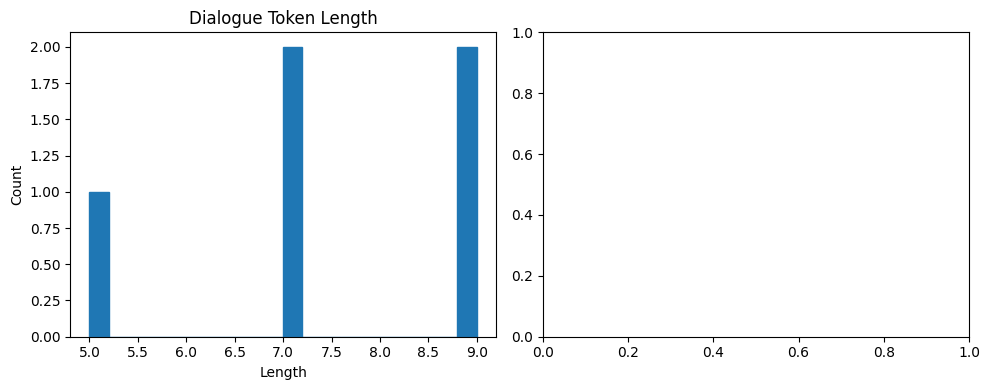

In [38]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot histogram for dialogue token lengths
axes[0].hist(dialogue_token_lens, bins=20, color='C0', edgecolor='C0')
axes[0].set_title("Dialogue Token Length")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Count")

# Display the histogram
plt.tight_layout()
plt.show()

### Tokenization and Preprocessing of dataset_samsum Dataset
#### dialogue feature

In [40]:
# Tokenize the dialogues in the training set
dialogue_tokens = [tokenizer.encode(s) for s in dataset_samsum['train']['dialogue']]
dialogue_token_lens = [len(tokenizer.encode(s)) for s in dataset_samsum['train']['dialogue']]


# Print the first 10 original dialogues and their tokenized versions
for i in range(10):
    original_dialogue = dataset_samsum['train']['dialogue'][i]
    tokenized_dialogue = dialogue_tokens[i]
    print(f"Original Dialogue {i+1}: {original_dialogue}")
    print(f"Tokenized Dialogue {i+1}: {tokenized_dialogue}\n")

Token indices sequence length is longer than the specified maximum sequence length for this model (1044 > 1024). Running this sequence through the model will result in indexing errors


Original Dialogue 1: Amanda: I baked  cookies. Do you want some?
Jerry: Sure!
Amanda: I'll bring you tomorrow :-)
Tokenized Dialogue 1: [12195, 151, 125, 7091, 3659, 107, 842, 119, 245, 181, 152, 10508, 151, 7435, 147, 12195, 151, 125, 131, 267, 650, 119, 3469, 29344, 1]

Original Dialogue 2: Olivia: Who are you voting for in this election? 
Oliver: Liberals as always.
Olivia: Me too!!
Oliver: Great
Tokenized Dialogue 2: [18038, 151, 2632, 127, 119, 6228, 118, 115, 136, 2974, 152, 10463, 151, 35884, 130, 329, 107, 18038, 151, 2587, 314, 1242, 10463, 151, 1509, 1]

Original Dialogue 3: Tim: Hi, what's up?
Kim: Bad mood tbh, I was going to do lots of stuff but ended up procrastinating
Tim: What did you plan on doing?
Kim: Oh you know, uni stuff and unfucking my room
Kim: Maybe tomorrow I'll move my ass and do everything
Kim: We were going to defrost a fridge so instead of shopping I'll eat some defrosted veggies
Tim: For doing stuff I recommend Pomodoro technique where u use breaks for d

In [41]:
print(f"Total No. of Dialogue : {len(dialogue_tokens)}")
print(f"Each Dialogue Tokens : {dialogue_token_lens}\n")

Total No. of Dialogue : 14732
Each Dialogue Tokens : [25, 26, 131, 48, 235, 105, 490, 220, 74, 186, 100, 23, 32, 153, 152, 206, 69, 95, 61, 59, 352, 297, 21, 346, 61, 108, 74, 141, 147, 145, 402, 121, 36, 204, 145, 171, 162, 192, 160, 246, 271, 255, 108, 361, 247, 180, 116, 174, 73, 334, 40, 140, 42, 135, 181, 97, 311, 156, 91, 91, 178, 390, 57, 238, 43, 57, 112, 116, 133, 46, 22, 64, 123, 100, 183, 75, 234, 69, 69, 362, 495, 63, 38, 171, 116, 139, 25, 88, 160, 178, 32, 27, 80, 83, 69, 40, 196, 112, 75, 59, 228, 26, 132, 141, 291, 56, 42, 90, 84, 94, 44, 38, 99, 79, 208, 161, 143, 114, 198, 262, 364, 51, 61, 76, 142, 74, 60, 398, 129, 83, 112, 189, 95, 49, 54, 89, 100, 135, 211, 48, 81, 77, 134, 121, 57, 167, 74, 144, 56, 92, 229, 255, 193, 228, 145, 61, 175, 81, 85, 239, 116, 64, 78, 300, 122, 168, 81, 34, 115, 222, 182, 124, 69, 128, 168, 71, 39, 178, 135, 79, 140, 61, 110, 286, 48, 154, 79, 107, 96, 35, 107, 128, 191, 120, 62, 117, 95, 77, 174, 199, 93, 237, 56, 54, 69, 258, 86, 81,

#### summary feature

In [43]:
# Tokenize the summary in the training set
summary_tokens = [tokenizer.encode(s) for s in dataset_samsum['train']['summary']]
summary_token_lens = [len(tokenizer.encode(s)) for s in dataset_samsum['train']['summary']]

# Print the first 10 original summaries and their tokenized versions
for i in range(10):
    original_summary = dataset_samsum['train']['summary'][i]
    tokenized_summary = summary_tokens[i]
    print(f"Original Dialogue {i+1}: {original_summary}")
    print(f"Tokenized Dialogue {i+1}: {tokenized_summary}\n")

Original Dialogue 1: Amanda baked cookies and will bring Jerry some tomorrow.
Tokenized Dialogue 1: [12195, 7091, 3659, 111, 138, 650, 10508, 181, 3469, 107, 1]

Original Dialogue 2: Olivia and Olivier are voting for liberals in this election. 
Tokenized Dialogue 2: [18038, 111, 34296, 127, 6228, 118, 33195, 115, 136, 2974, 107, 1]

Original Dialogue 3: Kim may try the pomodoro technique recommended by Tim to get more stuff done.
Tokenized Dialogue 3: [5377, 218, 508, 109, 891, 93882, 3111, 2087, 141, 4776, 112, 179, 154, 1549, 479, 107, 1]

Original Dialogue 4: Edward thinks he is in love with Bella. Rachel wants Edward to open his door. Rachel is outside. 
Tokenized Dialogue 4: [7535, 7234, 178, 117, 115, 298, 122, 14521, 107, 9199, 1728, 7535, 112, 428, 169, 1059, 107, 9199, 117, 833, 107, 1]

Original Dialogue 5: Sam is confused, because he overheard Rick complaining about him as a roommate. Naomi thinks Sam should talk to Rick. Sam is not sure what to do.
Tokenized Dialogue 5: [40

In [44]:
print(f"Total No. of summary : {len(summary_tokens)}")
print(f"Each summary Tokens : {summary_token_lens}\n")

Total No. of summary : 14732
Each summary Tokens : [11, 12, 17, 22, 32, 32, 50, 36, 19, 47, 19, 16, 7, 22, 23, 22, 41, 15, 21, 18, 19, 68, 16, 40, 20, 25, 21, 36, 45, 16, 69, 27, 9, 14, 25, 19, 26, 39, 27, 20, 63, 33, 22, 31, 17, 16, 23, 13, 7, 43, 10, 29, 19, 23, 36, 21, 44, 55, 31, 27, 33, 45, 18, 39, 17, 8, 26, 20, 30, 16, 14, 37, 12, 27, 54, 31, 44, 19, 11, 39, 59, 20, 8, 22, 21, 16, 12, 21, 41, 24, 13, 12, 7, 21, 23, 24, 48, 23, 25, 28, 41, 12, 22, 28, 38, 26, 16, 28, 15, 14, 24, 13, 28, 21, 33, 35, 19, 17, 40, 54, 28, 34, 10, 18, 26, 8, 11, 52, 23, 19, 16, 16, 23, 18, 21, 17, 10, 67, 11, 13, 23, 7, 25, 32, 7, 42, 9, 12, 15, 31, 40, 61, 19, 40, 27, 19, 57, 18, 45, 26, 28, 15, 12, 9, 14, 36, 21, 13, 23, 24, 27, 29, 11, 29, 20, 20, 21, 21, 21, 17, 23, 19, 16, 24, 26, 19, 12, 18, 26, 10, 25, 61, 34, 30, 27, 15, 13, 22, 59, 28, 28, 23, 13, 15, 9, 47, 30, 17, 23, 17, 17, 56, 18, 28, 41, 19, 19, 21, 30, 25, 37, 18, 46, 16, 26, 40, 55, 36, 18, 20, 13, 11, 8, 29, 10, 51, 38, 11, 37, 12, 2

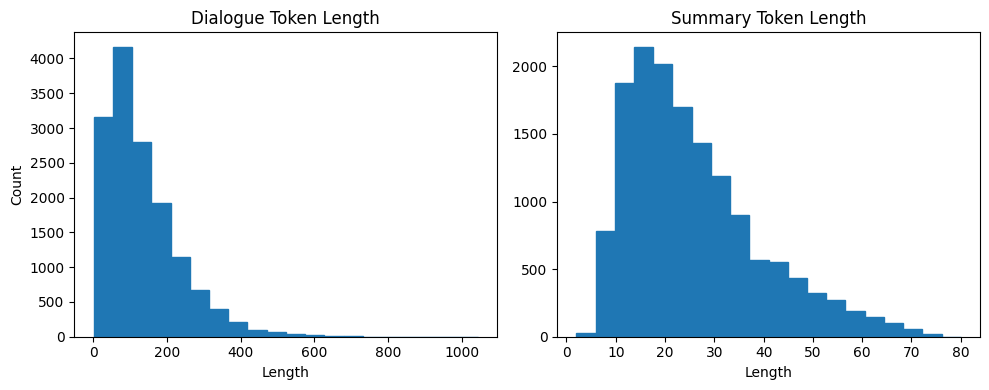

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(dialogue_token_lens, bins = 20, color = 'C0', edgecolor = 'C0' )
axes[0].set_title("Dialogue Token Length")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Count")

axes[1].hist(summary_token_lens, bins = 20, color = 'C0', edgecolor = 'C0' )
axes[1].set_title("Summary Token Length")
axes[1].set_xlabel("Length")
plt.tight_layout()
plt.show()

### Training

#### The provided function convert_examples_to_features and its application via dataset_samsum.map() is used for preprocessing and tokenizing a dataset to prepare it for training a model. This preprocessing step is essential in machine learning tasks, especially when dealing with text data. It converts raw text into token IDs that the model can understand and process.

#### This function, convert_examples_to_features, takes in a batch of examples from the dataset and returns tokenized features suitable for model training.

In [46]:
def convert_examples_to_features(example_batch):
    # Encode the input dialogues
    input_encodings = tokenizer(example_batch['dialogue'], max_length=1024, truncation=True)

    # Encode the summaries (targets) using the tokenizer with target-specific settings
    with tokenizer.as_target_tokenizer():
        target_encodings = tokenizer(example_batch['summary'], max_length=128, truncation=True)

    # Return the encoded features
    return {
        'input_ids': input_encodings['input_ids'],
        'attention_mask': input_encodings['attention_mask'],
        'labels': target_encodings['input_ids']
    }

##### 'dataset_samsum_pt' is the final dataset where each example has been preprocessed and tokenized according to the function. It will contain the tokenized dialogues, attention masks, and target labels, to pass model for tuning

In [47]:
dataset_samsum_pt = dataset_samsum.map(convert_examples_to_features, batched = True)

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

c:\Users\saima\Documents\virtualenvs\text_summarization_huggingFace\Lib\site-packages\transformers\tokenization_utils_base.py:4144: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

#### Inspecting the dataset_samsum_pt Dataset

In [48]:
dataset_samsum_pt

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 818
    })
})

In [49]:
print(dataset_samsum_pt["train"][0])  # Print the first example from the training set

{'id': '13818513', 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)", 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.', 'input_ids': [12195, 151, 125, 7091, 3659, 107, 842, 119, 245, 181, 152, 10508, 151, 7435, 147, 12195, 151, 125, 131, 267, 650, 119, 3469, 29344, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'labels': [12195, 7091, 3659, 111, 138, 650, 10508, 181, 3469, 107, 1]}


#### Create a data collator for sequence-to-sequence tasks
#### This handles dynamic padding for input and target sequences and creates attention masks.
#### It ensures all sequences in a batch have the same length and correctly masks padding tokens.
#### The collator also uses the provided tokenizer to handle any model-specific padding requirements.

In [50]:
from transformers import DataCollatorForSeq2Seq
seq2seq_data_collator = DataCollatorForSeq2Seq(tokenizer, model=model_pegasus)

### Setting the Training Arguments

In [51]:
from transformers import TrainingArguments, Trainer

trainer_args = TrainingArguments(
    output_dir='/content/pegasus-samsum',            # Directory to save model checkpoints and logs.
    num_train_epochs=1,                     # Number of epochs to train the model.
    warmup_steps=500,                      # Number of steps to perform learning rate warmup.
    per_device_train_batch_size=1,         # Batch size for training per device (e.g., GPU).
    per_device_eval_batch_size=1,          # Batch size for evaluation per device.
    weight_decay=0.01,                     # Weight decay (L2 regularization) applied during training.
    logging_steps=10,                     # Number of steps between logging events.
    evaluation_strategy='steps',           # Evaluation strategy: evaluate the model every `eval_steps` steps.
    eval_steps=500,                        # Number of steps between evaluations.
    save_steps=1e6,                        # Number of steps between saving model checkpoints.
    gradient_accumulation_steps=16         # Number of steps to accumulate gradients before performing a backward/update pass.
)

c:\Users\saima\Documents\virtualenvs\text_summarization_huggingFace\Lib\site-packages\transformers\training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.21.0`: Please run `pip install transformers[torch]` or `pip install accelerate -U`

In [52]:
# Initialize the Trainer with training arguments and datasets
trainer = Trainer(
    model=model_pegasus,                       # The pre-trained PEGASUS model to be trained
    args=trainer_args,                         # Training arguments including hyperparameters and configurations
    tokenizer=tokenizer,                       # The tokenizer used for encoding the input and output texts
    data_collator=seq2seq_data_collator,       # Data collator to dynamically pad inputs and labels for batches
    train_dataset=dataset_samsum_pt["train"],  # The training dataset with tokenized input and output sequences
    eval_dataset=dataset_samsum_pt["validation"] # The validation dataset for evaluating model performance during training
)

# Explanation:
# The Trainer class is a high-level API provided by the transformers library, designed to simplify the training and evaluation
# of transformer models. Here, it is configured with the PEGASUS model, tokenizer, data collator, and the tokenized datasets.
# This setup allows for easy management of the training process, including batching, padding, and evaluation.

NameError: name 'trainer_args' is not defined

In [ ]:
trainer.train()